
# Importing the data

In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Documents\\Titanic data for data science\\spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Dropping the columns that we don't need

In [25]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data.drop(columns=columns_to_drop, inplace=True)

In [26]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Analysis

In [27]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Processing

In [29]:
# Use pandas' get_dummies function to create dummy variables
data_encoded = pd.get_dummies(data, columns=['v1'])
df=data_encoded

In [30]:
df

,v2,v1_ham,v1_spam
0,"Go until jurong point, crazy.. Available only ...",True,False
1,Ok lar... Joking wif u oni...,True,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,False,True
3,U dun say so early hor... U c already then say...,True,False
4,"Nah I don't think he goes to usf, he lives aro...",True,False
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,False,True
5568,Will Ì_ b going to esplanade fr home?,True,False
5569,"Pity, * was in mood for that. So...any other s...",True,False
5570,The guy did some bitching but I acted like i'd...,True,False


In [31]:
df.drop(columns=['v1_ham'], inplace=True)


In [32]:
df

,v2,v1_spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,True
5568,Will Ì_ b going to esplanade fr home?,False
5569,"Pity, * was in mood for that. So...any other s...",False
5570,The guy did some bitching but I acted like i'd...,False


In [33]:
df = df.rename(columns={'v1_spam': 'Spam','v2':'Mail'})
df

,Mail,Spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,True
5568,Will Ì_ b going to esplanade fr home?,False
5569,"Pity, * was in mood for that. So...any other s...",False
5570,The guy did some bitching but I acted like i'd...,False


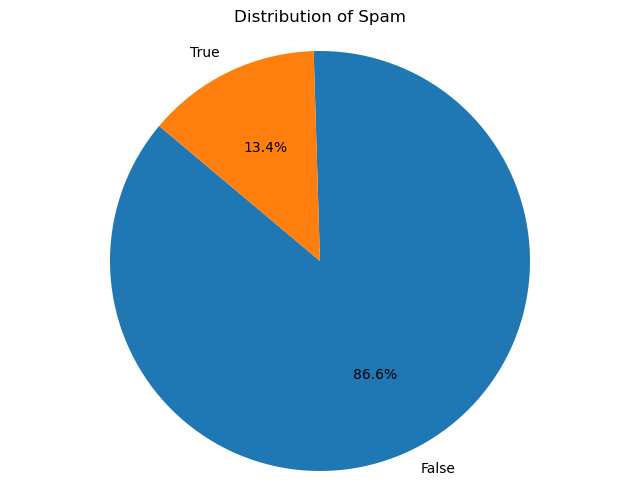

In [41]:
spam_counts = df['Spam'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam')
plt.axis('equal')
plt.show()

# Feature Extraction and  Model Traning

In [34]:
from sklearn.model_selection import train_test_split
X=df['Mail']
Y=df['Spam']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train

1978    False
3989     True
3935    False
4078    False
4086     True
        ...  
3772    False
5191    False
5226    False
5390    False
860     False
Name: Spam, Length: 4457, dtype: bool

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

# Making Predictions

In [37]:
emails = [
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

predictions = clf.predict(emails)

for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Email {i+1}: Ham")
    else:
        print(f"Email {i+1}: Spam")


Email 1: Ham
Email 2: Spam


In [38]:
emails = [
    
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES',
    'Man can you hook me up with some dough?'
]

predictions = clf.predict(emails)

for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Email {i+1}: Ham")
    else:
        print(f"Email {i+1}: Spam")


Email 1: Spam
Email 2: Ham


# Accuracy of the Model

In [39]:
clf.score(X_test,Y_test)

0.9838565022421525

# Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
predicted_labels = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[963   2]
 [ 16 134]]
